## Logistic Regression and KNN

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [61]:
cat_to_meaning = {"0": "[-inf, -2%]", "1": "[-2, -0%]", "2":"[+0%, +2%]", "3":"[+2%, +inf]"}
cats = pd.DataFrame(cat_to_meaning.items())
cats = cats.drop(0, axis = 1)
cats.columns = ["Interval of Profit Margin"]

In [62]:
X = pd.read_csv("X.csv", header = None)
y = pd.read_csv("y.csv", header = None)

col_names = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'MAXH', 'MAXD', 'MAXA']
print(col_names)
extended_col_names = col_names.copy()
for i in range(5):
    extended_col_names.extend([name + "_H_" + str(i) for name in col_names])
for i in range(5):
    extended_col_names.extend([name + "_A_" + str(i) for name in col_names])

extended_col_names = [ele for ele in extended_col_names if ele not in ['MAXH','MAXD','MAXA']]

X.columns = extended_col_names

#WE DON'T WANT TO TRAIN ON GAME STATS, ONLY PREVIOUS
X.drop(['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG','HTR', 'HS', 'AS', 'HST',
        'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR'], axis = 1, inplace = True)

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'MAXH', 'MAXD', 'MAXA']


In [63]:
trans_y = y.transpose()
val_counts = trans_y.value_counts()
int_counts = pd.DataFrame(val_counts)
int_counts.columns = ["Number of Games"]
int_counts.reset_index(inplace = True)
int_counts = pd.concat([cats, int_counts], axis = 1)
int_counts = int_counts.iloc[:, [0,2]]
int_counts

,Interval of Profit Margin,Number of Games
0,"[-inf, -2%]",3110
1,"[-2, -0%]",1719
2,"[+0%, +2%]",529
3,"[+2%, +inf]",51


### Multi-Class Classification

In [64]:
y = y.iloc[0].values
#print(type(y), type(y[0]))
y = np.array([num + 2 for num in y])
#print(type(y), type(y[0]))
X = X.values

In [65]:
print(len(X), len(y))
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = .5, random_state=4)

5409 5409


In [66]:
scaler = StandardScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [67]:
#print(min(y_te), max(y_te), min(y_tr), max(y_tr))

In [68]:
logreg_m = LogisticRegression(solver = "newton-cholesky", random_state = 10)
logreg_m.fit(X_tr_scaled, y_tr)
y_pred_m = logreg_m.predict(X_te_scaled)
log_reg_m_acc = accuracy_score(y_te, y_pred_m)

In [69]:
log_reg_m_acc

0.6247689463955638

In [77]:
balanced_accuracy_score(y_te, y_pred_m, adjusted = True)

0.07430743209431734

In [71]:
cfm

array([[187, 387,   0,   0],
       [113, 908,   0,   0],
       [ 11, 168,   0,   0],
       [  0,  11,   0,   0]])

In [73]:
np.unique(y_te)

array([0, 1, 3, 4])

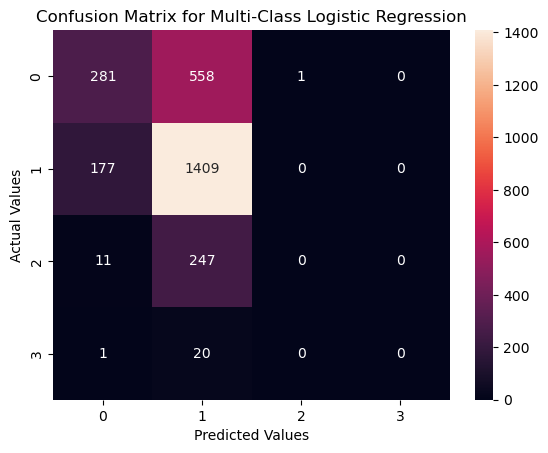

In [75]:
cfm = confusion_matrix(y_te, y_pred_m, labels = np.unique(y_te))
sns.heatmap(cfm, annot = True, fmt = "d")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix for Multi-Class Logistic Regression")
plt.savefig("conf_m.png", dpi = 400)

In [13]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_tr_scaled, y_tr)
n_pred = neigh.predict(X_te_scaled)
knn_acc = accuracy_score(y_te, n_pred)
print(np.round(knn_acc, 4), "Accuracy from the K nearest neighbors algorithm")

0.544 Accuracy from the K nearest neighbors algorithm


### Binary Classification

In [14]:
def multi_to_binary(num):
    if num <=2:
        return 0
    else:
        return 1

In [15]:
b_y = [multi_to_binary(num) for num in y]

In [16]:
X_tr2, X_te2, by_tr, by_te = train_test_split(X, b_y, test_size = .33, random_state=42)
Xb_tr_scaled = scaler.fit_transform(X_tr2)
Xb_te_scaled = scaler.transform(X_te2)

In [24]:
logreg_b = LogisticRegression(solver = "newton-cholesky", random_state = 11)
logreg_b.fit(Xb_tr_scaled, by_tr)
y_pred_b = logreg_b.predict(Xb_te_scaled)
y_pred_probs_b1 = logreg_b.predict_proba(Xb_te_scaled)[:, 1]
logreg_b_acc = accuracy_score(by_te, y_pred_b)
print(np.round(logreg_b_acc, 4), "Accuracy from Logistic Regression")

0.8936 Accuracy from Logistic Regression


In [76]:
balanced_accuracy_score(by_te, y_pred_b, adjusted = True)

0.0

In [25]:
neigh_b = KNeighborsClassifier(n_neighbors = 5)
neigh_b.fit(Xb_tr_scaled, by_tr)
n_pred_b = neigh.predict(Xb_te_scaled)
knn_acc_b = accuracy_score(by_te, n_pred_b)
print(np.round(knn_acc_b, 4), "Accuracy from the K nearest neighbors algorithm")

0.3339 Accuracy from the K nearest neighbors algorithm


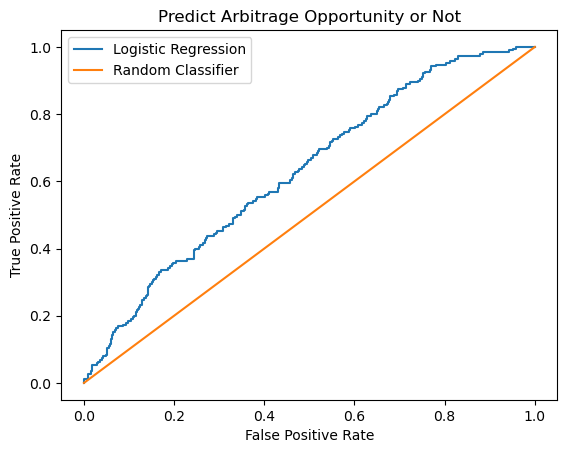

In [31]:

bin_logreg_fpr, bin_logreg_tpr, bin_logreg_thresh = roc_curve(by_te, y_pred_probs_b1)
plt.title("Predict Arbitrage Opportunity or Not")
plt.plot(bin_logreg_fpr, bin_logreg_tpr, label = "Logistic Regression")
plt.plot(bin_logreg_fpr, bin_logreg_fpr, label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()